<a href="https://colab.research.google.com/github/aswini-training/python/blob/main/Python_Powerlifting_Mini_project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 1. Top 10 states for Men.
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
dtype_dict = {'Sex': 'str', 'State': 'str'}
df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv", dtype = dtype_dict)
men_df = df[df['Sex'] == 'M']
men_by_state = men_df.groupby('State').size()
sorted_states = men_by_state.sort_values(ascending=False)
top_10_states = sorted_states.head(10)
print("Top 10 States for Men:")
print(top_10_states)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-ee40039773ba>:7: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv", dtype = dtype_dict)


Top 10 States for Men:
State
CA    32456
TX    23517
OH    11486
FL    11341
PA    10857
NC    10510
NY     9523
VA     9312
ON     9052
AZ     7632
dtype: int64


State
MA    5273
OK    5075
BC    4823
TN    4680
OR    4632
NM    4364
MI    4330
AB    4184
AL    4133
IN    4036
dtype: int64


<ipython-input-5-ef47a0ef3017>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_to_30_states.index, y=top_20_to_30_states.values, palette='bright')


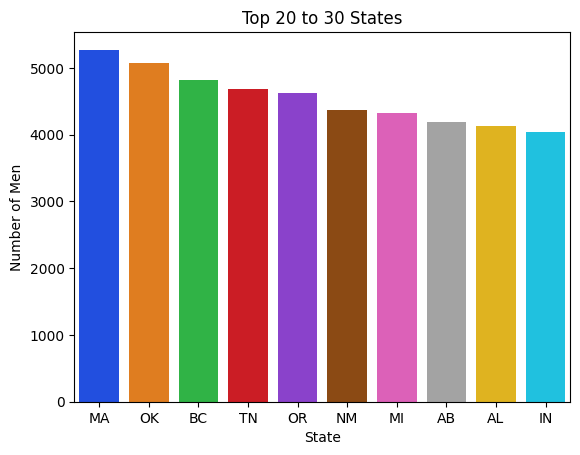

In [5]:
#2. Pie chart and bar chart for Men Top 20-30 states.
import seaborn as sns
import matplotlib.pyplot as plt
men_by_state = men_df.groupby('State').size()
sorted_states = men_by_state.sort_values(ascending=False)
top_20_to_30_states = sorted_states.iloc[19:29]
print(top_20_to_30_states)

#creating a bar graph using Seaborn:
sns.barplot(x=top_20_to_30_states.index, y=top_20_to_30_states.values, palette='bright')
plt.xlabel('State')
plt.ylabel('Number of Men')
plt.title('Top 20 to 30 States')
plt.show()


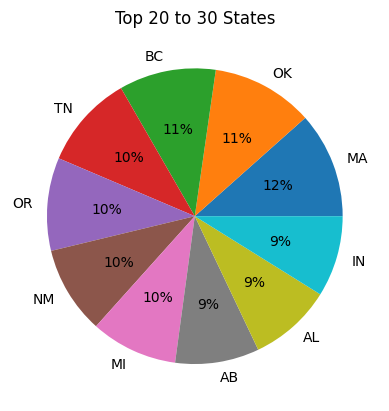

In [6]:
#3. creating pie chart using Matplotlib

men_by_state = men_df.groupby('State').size()
sorted_states = men_by_state.sort_values(ascending=False)
top_20_to_30_states = sorted_states.iloc[19:29]
plt.pie(top_20_to_30_states, labels=top_20_to_30_states.index, autopct='%1.0f%%')
plt.title('Top 20 to 30 States')
plt.show()


In [7]:
#4. Top 10 states for Men in year 2021 (Use Custom Function)
#extracting year from Date column.
men_df['year'] = pd.DatetimeIndex(men_df['Date']).year
#print("Get the year from the date column:\n", df)
men_by_state = men_df.groupby(['State', 'year' ]).size().reset_index(name='count')
men_2021 = men_by_state.loc[men_by_state['year'] == 2021]
top_10_states = men_2021.sort_values(by='count',ascending=False).head(10)
print("Top 10 States for Men in 2021:")
print(top_10_states)


Top 10 States for Men in 2021:
     State  year  count
201     CA  2021   3384
1686    TX  2021   3037
356     FL  2021   1781
1230    OH  2021   1529
1329    PA  2021   1183
1734    VA  2021   1156
893     NC  2021   1109
1204    NY  2021   1033
383     GA  2021    935
794     MO  2021    893


<ipython-input-7-b7effaee8c57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_df['year'] = pd.DatetimeIndex(men_df['Date']).year


<ipython-input-12-18e7f8be707b>:16: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  age_range = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv")
<ipython-input-12-18e7f8be707b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_range_filtered['Age Group']=pd.cut(age_range_filtered['Age'],bins=bin,labels=category) #to create AgeGroup column based on the bin


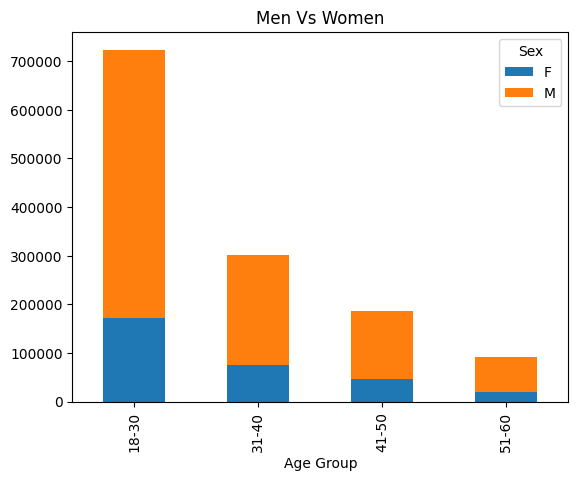

In [12]:
#5. Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60

def get_age_group(age):
    if age < 18:
        return 'Under 18'
    elif age >= 18 and age < 30:
        return '18-30'
    elif age >= 31 and age < 40:
        return '31-40'
    elif age >= 41 and age < 50:
        return '41-50'
    elif age >= 51 and age < 60:
        return '51-60'
    else:
        return 'Age is not within the range'
age_range = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv")
age_range['Age_Group'] = age_range['Age'].apply(get_age_group)
filter_sex = age_range["Sex"].isin(["M", "F"])
age_range_filtered = age_range[filter_sex]
bin=[18,31,41,51,61]
category=['18-30','31-40','41-50','51-60']
age_range_filtered['Age Group']=pd.cut(age_range_filtered['Age'],bins=bin,labels=category) #to create AgeGroup column based on the bin
new_agegroup_data=age_range_filtered.groupby(['Age Group','Sex']).size().unstack()
new_agegroup_data.plot(kind='bar',stacked=True,title="Men Vs Women")
plt.show()



<ipython-input-13-13d0a0ddded8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_range_filtered['Age_Group']=pd.cut(age_range_filtered['Age'],bins=bin,labels=category)


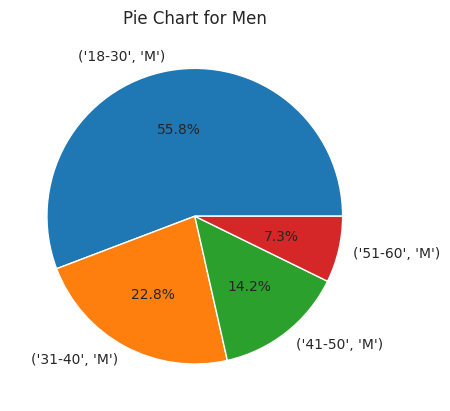

<ipython-input-13-13d0a0ddded8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_range_filtered['Age_Group']=pd.cut(age_range_filtered['Age'],bins=bin,labels=category)


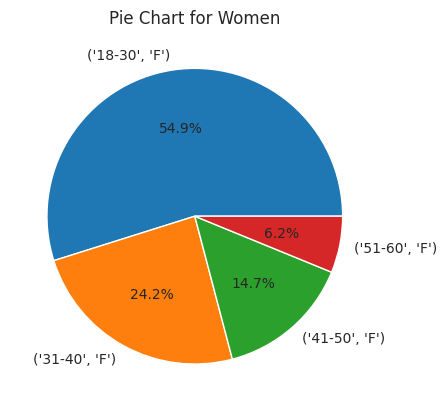

In [13]:
#6. Pie chart for men and women w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)

filter_sex = age_range["Sex"].isin(["M"])
age_range_filtered = age_range[filter_sex]
bin=[18,31,41,51,61]
category=['18-30','31-40','41-50','51-60']
#to create AgeGroup column based on the bin
age_range_filtered['Age_Group']=pd.cut(age_range_filtered['Age'],bins=bin,labels=category)
new_agegroup_data=age_range_filtered.groupby(['Age_Group', 'Sex']).size()
sns.set_style("whitegrid")
plt.pie(new_agegroup_data,labels=new_agegroup_data.index,autopct='%1.1f%%')
plt.title('Pie Chart for Men')
plt.show()

#Pie chart for women w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)
filter_sex = age_range["Sex"].isin(["F"])
age_range_filtered = age_range[filter_sex]
bin=[18,31,41,51,61]
category=['18-30','31-40','41-50','51-60']
#to create AgeGroup column based on the bin
age_range_filtered['Age_Group']=pd.cut(age_range_filtered['Age'],bins=bin,labels=category)
new_agegroup_data=age_range_filtered.groupby(['Age_Group', 'Sex']).size()
sns.set_style("whitegrid")
plt.pie(new_agegroup_data,labels=new_agegroup_data.index,autopct='%1.1f%%')
plt.title('Pie Chart for Women')
plt.show()


<ipython-input-5-ba1047105364>:5: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  age_range = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv")


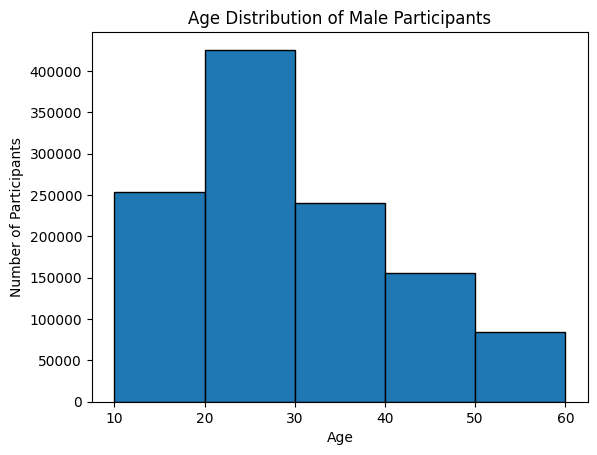

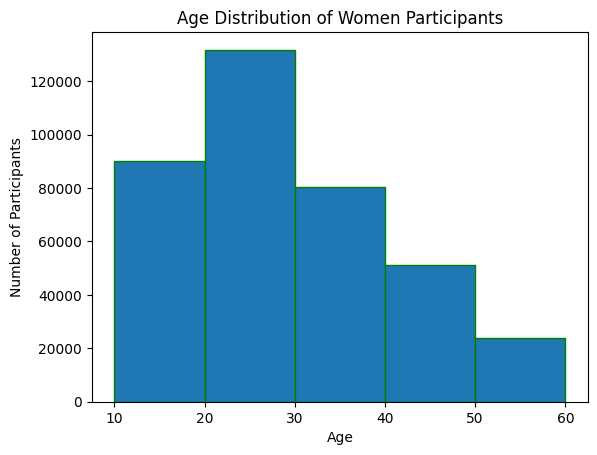

In [ ]:
#7. Histogram for men by age (use Age for binning purpose)

import pandas as pd
import matplotlib.pyplot as plt
age_range = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv")
bins = [10, 20, 30, 40, 50, 60]
age_range_men = age_range[age_range["Sex"] == "M"]

# Using plt.hist to plot the histogram
plt.hist(age_range_men['Age'], bins=bins, edgecolor='black')

# Setting the titles and labels
plt.title("Age Distribution of Male Participants")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.xticks(bins)
plt.show()

# Using Age as bin for women
age_range_women = age_range[age_range["Sex"] == "F"]
plt.hist(age_range_women['Age'], bins=bins, edgecolor='green')
plt.title("Age Distribution of Women Participants")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.xticks(bins)
plt.show()
